In [1]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

sys.path.append(os.path.abspath('..'))

from src.models import BaselineModel

print("Đã setup môi trường và import BaselineModel thành công!")

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Đã setup môi trường và import BaselineModel thành công!


In [3]:
# Cấu hình đường dẫn
DATA_DIR = '../data/processed'
ARTIFACTS_DIR = '../demo/artifacts'

# Tạo thư mục lưu model nếu chưa có
os.makedirs(ARTIFACTS_DIR, exist_ok=True)

print(f"{'='*10} LOADING DATA (STAT) {'='*10}")

# 1. Load dữ liệu
df_train = pd.read_csv(os.path.join(DATA_DIR, 'train_stat.csv'))
df_val   = pd.read_csv(os.path.join(DATA_DIR, 'val_stat.csv'))
df_test  = pd.read_csv(os.path.join(DATA_DIR, 'test_stat.csv'))

# 2. Tách X và y
X_train = df_train['text'].astype(str)
y_train = df_train['label']

X_val   = df_val['text'].astype(str)
y_val   = df_val['label']

X_test  = df_test['text'].astype(str)
y_test  = df_test['label']

print(f"Train shape: {X_train.shape}")
print(f"Val shape:   {X_val.shape}")
print(f"Test shape:  {X_test.shape}")
print("-" * 30)

========== LOADING DATA (STAT) ==========
Train shape: (3180,)
Val shape:   (682,)
Test shape:  (682,)
------------------------------


In [4]:
# --- Hàm vẽ Confusion Matrix ---
def plot_cm(y_true, y_pred, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Bình thường', 'Mỉa mai', 'Xúc phạm'],
                yticklabels=['Bình thường', 'Mỉa mai', 'Xúc phạm'])
    plt.title(title)
    plt.ylabel('Thực tế (Actual)')
    plt.xlabel('Dự đoán (Predicted)')
    plt.show()

==================== 1. NAIVE BAYES ====================

[Baseline] Đang Tuning & Training (naive_bayes)
Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best Params: {'clf__alpha': 0.1}
Best CV Macro F1: 0.4333
-> [Baseline] Huấn luyện hoàn tất.

--- Kết quả trên tập Validation ---

--- Báo cáo Đánh giá (naive_bayes) ---
              precision    recall  f1-score   support

           0       0.81      0.98      0.89       534
           1       0.64      0.22      0.33        82
           2       1.00      0.12      0.22        66

    accuracy                           0.81       682
   macro avg       0.82      0.44      0.48       682
weighted avg       0.81      0.81      0.76       682



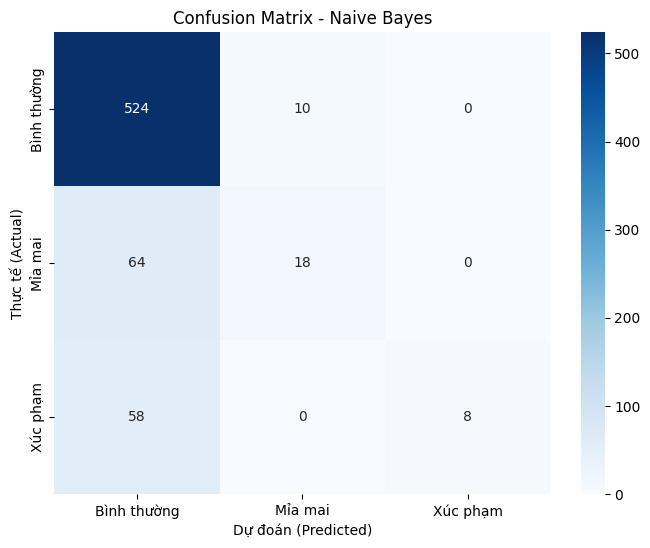

[Baseline] Đã lưu model tại: ../demo/artifacts/naive_bayes.pkl


In [6]:
print(f"{'='*20} 1. NAIVE BAYES {'='*20}")

# Khởi tạo
nb_model = BaselineModel(model_type='naive_bayes')

# Train & Tuning
nb_model.train(X_train, y_train)

# Đánh giá trên tập Validation
print("\n--- Kết quả trên tập Validation ---")
nb_model.evaluate(X_val, y_val)

# Vẽ Confusion Matrix
y_pred_nb = nb_model.predict(X_val)
plot_cm(y_val, y_pred_nb, title="Confusion Matrix - Naive Bayes")

# Lưu model
save_path = os.path.join(ARTIFACTS_DIR, 'naive_bayes.pkl')
nb_model.save(save_path)

==================== Đánh giá trên tập TEST ====================

--- Kết quả trên tập Test ---

--- Báo cáo Đánh giá (naive_bayes) ---
              precision    recall  f1-score   support

           0       0.81      0.98      0.89       534
           1       0.61      0.17      0.27        82
           2       0.75      0.09      0.16        66

    accuracy                           0.80       682
   macro avg       0.72      0.41      0.44       682
weighted avg       0.78      0.80      0.74       682



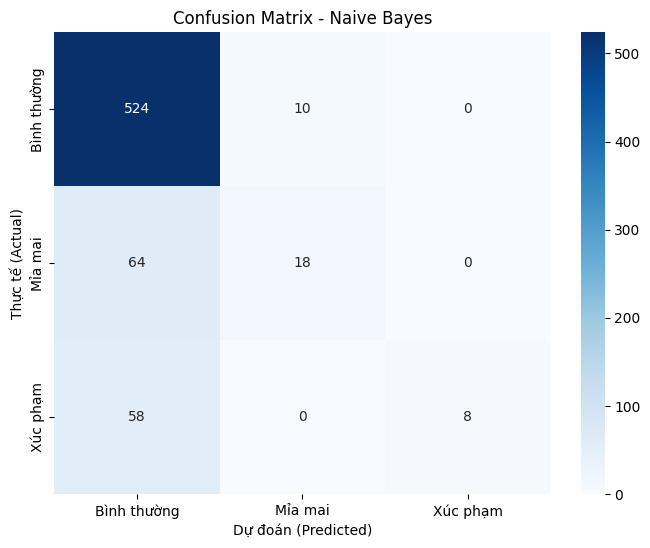

In [8]:
# Đánh giá trên tập Test
print(f"{'='*20} Đánh giá trên tập TEST {'='*20}")
print("\n--- Kết quả trên tập Test ---")
nb_model.evaluate(X_test, y_test)

# Vẽ Confusion Matrix
y_pred_nb = nb_model.predict(X_val)
plot_cm(y_val, y_pred_nb, title="Confusion Matrix - Naive Bayes")


==================== 2. LOGISTIC REGRESSION ====================

[Baseline] Đang Tuning & Training (logreg)
Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best Params: {'clf__C': 1}
Best CV Macro F1: 0.5368
-> [Baseline] Huấn luyện hoàn tất.

--- Báo cáo Đánh giá (logreg) ---
              precision    recall  f1-score   support

           0       0.88      0.83      0.86       534
           1       0.39      0.51      0.44        82
           2       0.42      0.47      0.45        66

    accuracy                           0.76       682
   macro avg       0.57      0.60      0.58       682
weighted avg       0.78      0.76      0.77       682



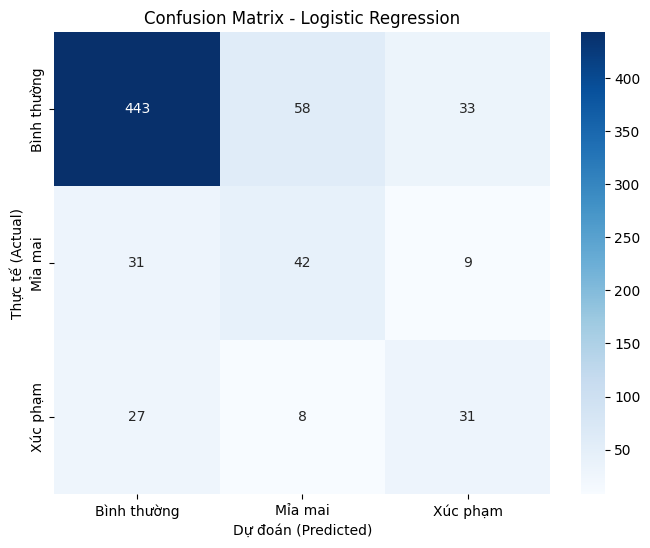

[Baseline] Đã lưu model tại: ../demo/artifacts/logreg.pkl


In [9]:
print(f"\n{'='*20} 2. LOGISTIC REGRESSION {'='*20}")

# Khởi tạo
lr_model = BaselineModel(model_type='logreg')

# Train & Tuning
lr_model.train(X_train, y_train)

# Đánh giá
lr_model.evaluate(X_val, y_val)

# Vẽ Confusion Matrix
y_pred_lr = lr_model.predict(X_val)
plot_cm(y_val, y_pred_lr, title="Confusion Matrix - Logistic Regression")

# Lưu model
save_path = os.path.join(ARTIFACTS_DIR, 'logreg.pkl')
lr_model.save(save_path)

==================== Đánh giá trên tập TEST ====================

--- Kết quả trên tập Test ---

--- Báo cáo Đánh giá (logreg) ---
              precision    recall  f1-score   support

           0       0.90      0.80      0.85       534
           1       0.37      0.49      0.42        82
           2       0.39      0.56      0.46        66

    accuracy                           0.74       682
   macro avg       0.55      0.62      0.58       682
weighted avg       0.78      0.74      0.76       682



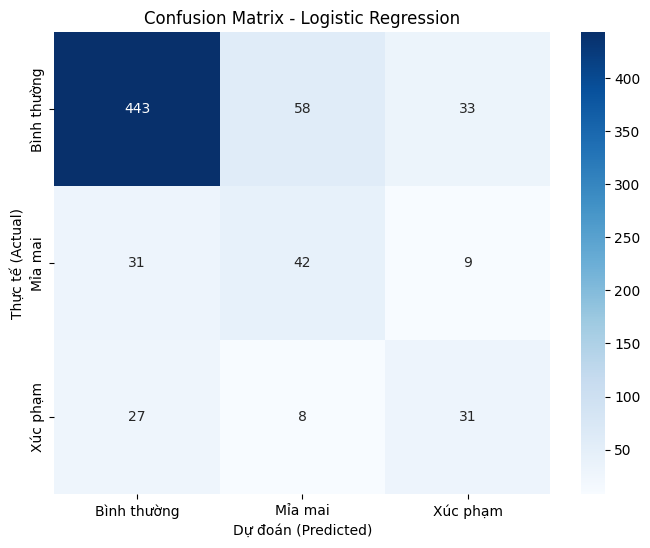

In [10]:
# Đánh giá trên tập Test
print(f"{'='*20} Đánh giá trên tập TEST {'='*20}")
print("\n--- Kết quả trên tập Test ---")
lr_model.evaluate(X_test, y_test)

# Vẽ Confusion Matrix
y_pred_lr = lr_model.predict(X_val)
plot_cm(y_val, y_pred_lr, title="Confusion Matrix - Logistic Regression")


==================== 3. SUPPORT VECTOR MACHINE (SVM) ====================

[Baseline] Đang Tuning & Training (svm)
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best Params: {'clf__C': 1}
Best CV Macro F1: 0.5280
-> [Baseline] Huấn luyện hoàn tất.

--- Báo cáo Đánh giá (svm) ---
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       534
           1       0.36      0.52      0.43        82
           2       0.47      0.41      0.44        66

    accuracy                           0.76       682
   macro avg       0.57      0.59      0.58       682
weighted avg       0.78      0.76      0.77       682



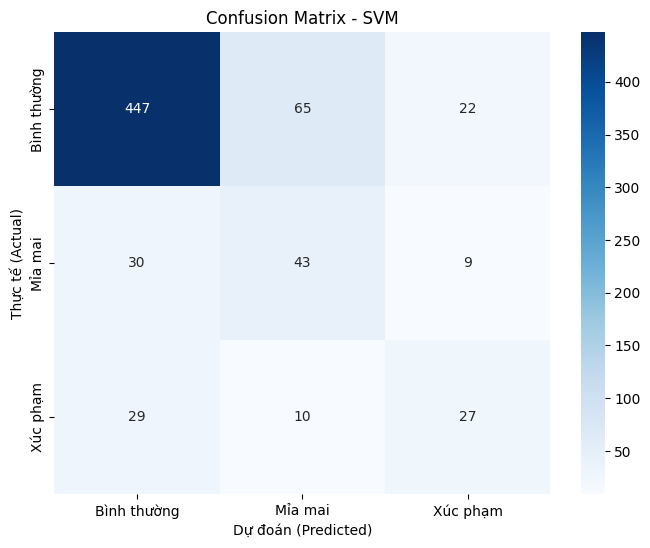

[Baseline] Đã lưu model tại: ../demo/artifacts/svm.pkl


In [11]:
print(f"\n{'='*20} 3. SUPPORT VECTOR MACHINE (SVM) {'='*20}")

# Khởi tạo
svm_model = BaselineModel(model_type='svm')

# Train & Tuning
svm_model.train(X_train, y_train)

# Đánh giá
svm_model.evaluate(X_val, y_val)

# Vẽ Confusion Matrix
y_pred_svm = svm_model.predict(X_val)
plot_cm(y_val, y_pred_svm, title="Confusion Matrix - SVM")

# Lưu model
save_path = os.path.join(ARTIFACTS_DIR, 'svm.pkl')
svm_model.save(save_path)

==================== Đánh giá trên tập TEST ====================

--- Kết quả trên tập Test ---

--- Báo cáo Đánh giá (svm) ---
              precision    recall  f1-score   support

           0       0.87      0.82      0.84       534
           1       0.33      0.44      0.38        82
           2       0.38      0.39      0.39        66

    accuracy                           0.73       682
   macro avg       0.53      0.55      0.54       682
weighted avg       0.76      0.73      0.74       682



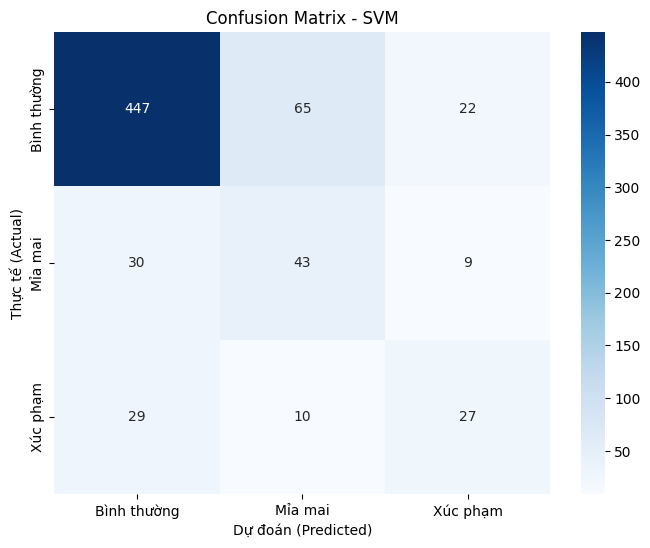

In [12]:
# Đánh giá trên tập Test
print(f"{'='*20} Đánh giá trên tập TEST {'='*20}")
print("\n--- Kết quả trên tập Test ---")
svm_model.evaluate(X_test, y_test)
# Vẽ Confusion Matrix
y_pred_svm = svm_model.predict(X_val)
plot_cm(y_val, y_pred_svm, title="Confusion Matrix - SVM")